### import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### Load dataset

In [2]:
data=pd.read_csv("car_prediction_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
print(data.Fuel_Type.value_counts())
print("___________")
print(data.Seller_Type.value_counts())
print("___________")
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
___________
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
___________
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### Encoading the categorical data

In [8]:
data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
data['Seller_Type']=data['Seller_Type'].map({'Dealer':0,'Individual':1})
data['Transmission']=data['Transmission'].map({'Manual':0,'Automatic':1})

In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
data.drop('Car_Name',axis=1,inplace=True)

In [11]:
X=data.drop('Selling_Price',axis=1)
y=data['Selling_Price']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

### Model Tranning

#### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=regression.predict(X_test)
y_pred

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

### Evaluation

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score=r2_score(y_test,y_pred)
print(r2_score) 
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.8365766715026374
2.15012991898452


### visualization

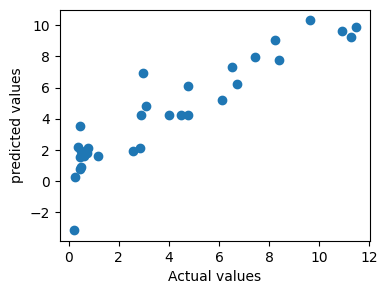

In [26]:
plt.figure(figsize=(4,3))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

#### Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
laso=Lasso()
laso.fit(X_train,y_train)

Lasso()

In [20]:
y_pred_laso=laso.predict(X_test)
y_pred_laso

array([ 9.87888122,  1.42396266,  4.33267834,  3.17313445,  8.95590579,
        4.29397384,  3.73913632,  5.66283974,  0.91478394,  5.25514316,
        6.47238818,  4.39507335,  1.2955156 ,  8.26559961,  2.00292338,
        2.32529219,  2.55349653,  2.34742172,  7.96895166,  4.18441245,
        2.3369918 ,  7.86598537,  2.02308236,  8.56734786,  1.55498136,
        6.48561097,  2.11427451, -1.18422036,  4.01710445,  2.21749695,
        2.41820898])

### Evaluation

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score=r2_score(y_test,y_pred_laso)
r2_score
mse=mean_squared_error(y_test,y_pred_laso)
print(mse)

1.6983234006965484


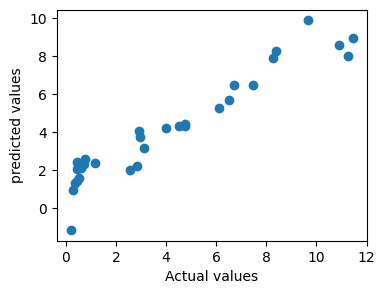

In [27]:
plt.figure(figsize=(4,3))
plt.scatter(y_test,y_pred_laso)
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

**Here Laso regression gives the moore acurate result as comapared to Linear regression**

In [30]:
input_data=(2014,5.59,27000,0,0,0,0)
#changing the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array as we predicting from one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=laso.predict(input_data_reshaped)
print('Predicted price of the car is :',prediction)


Predicted price of the car is : [3.8257306]


C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
